# 01. Import libraries and create path

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/andrea/Desktop/Happiness'

# 02. Import and clean 2015 dataset

In [4]:
# import 2015 data
df15 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_2015.csv'), index_col = False)

In [5]:
df15.shape

(158, 10)

In [6]:
df15.head()

Unnamed: 0 Country or region  Happiness Rank  Happiness Score  Economy  \
0           0       Switzerland               1            7.587  1.39651   
1           1           Iceland               2            7.561  1.30232   
2           2           Denmark               3            7.527  1.32548   
3           3            Norway               4            7.522  1.45900   
4           4            Canada               5            7.427  1.32629   

    Family   Health  Freedom    Trust  Generosity  
0  1.34951  0.94143  0.66557  0.41978     0.29678  
1  1.40223  0.94784  0.62877  0.14145     0.43630  
2  1.36058  0.87464  0.64938  0.48357     0.34139  
3  1.33095  0.88521  0.66973  0.36503     0.34699  
4  1.32261  0.90563  0.63297  0.32957     0.45811

In [7]:
# drop columns 'Unnamed: 0', 'Country or region', 'Happiness Rank'
df_15 = df15.drop(columns = ['Unnamed: 0', 'Country or region', 'Happiness Rank'])

In [8]:
# check output
df_15.head()

Happiness Score  Economy   Family   Health  Freedom    Trust  Generosity
0            7.587  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678
1            7.561  1.30232  1.40223  0.94784  0.62877  0.14145     0.43630
2            7.527  1.32548  1.36058  0.87464  0.64938  0.48357     0.34139
3            7.522  1.45900  1.33095  0.88521  0.66973  0.36503     0.34699
4            7.427  1.32629  1.32261  0.90563  0.63297  0.32957     0.45811

# 03. 2015 elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df_15).score(df_15) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/an

[-260.9265392505886,
 -92.60541899776682,
 -57.685006209259406,
 -42.47887959158906,
 -35.261589965201644,
 -31.249954813711074,
 -28.094372584296913,
 -26.583649893073336,
 -24.278079063554472]

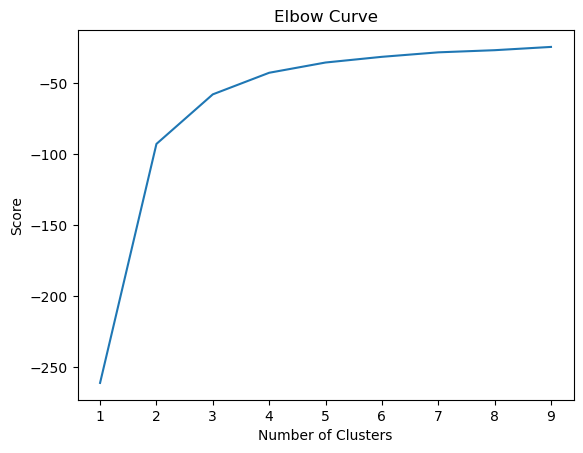

In [13]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Per the elbow curve the optimal count for clusters is 3. It can be seen in the chart that there is line that steeply goes up from 1 to 3, but then the curve straightens out. 

# 04. 2015 k-means clustering

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [18]:
# Fit the k-means object to the data.

kmeans.fit(df_15)

/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
df_15['clusters'] = kmeans.fit_predict(df_15)

/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
df_15.head()

Happiness Score  Economy   Family   Health  Freedom    Trust  Generosity  \
0            7.587  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678   
1            7.561  1.30232  1.40223  0.94784  0.62877  0.14145     0.43630   
2            7.527  1.32548  1.36058  0.87464  0.64938  0.48357     0.34139   
3            7.522  1.45900  1.33095  0.88521  0.66973  0.36503     0.34699   
4            7.427  1.32629  1.32261  0.90563  0.63297  0.32957     0.45811   

   clusters  
0         1  
1         1  
2         1  
3         1  
4         1

In [21]:
df_15['clusters'].value_counts()

2    60
0    59
1    39
Name: clusters, dtype: int64

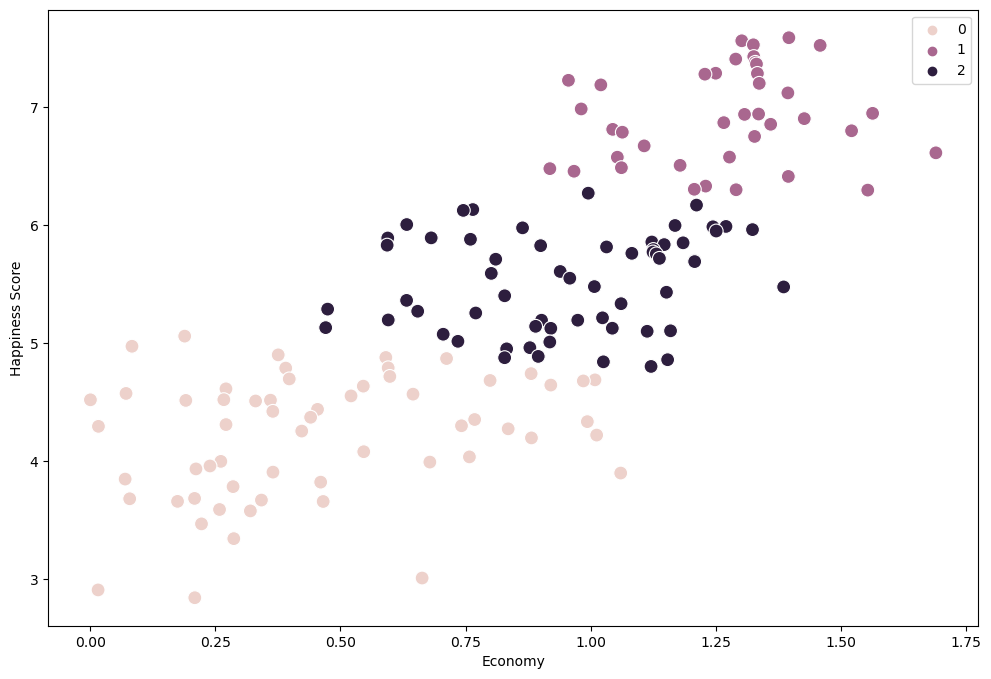

In [22]:
# Plot the clusters for the "Happiness Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_15['Economy'], y=df_15['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

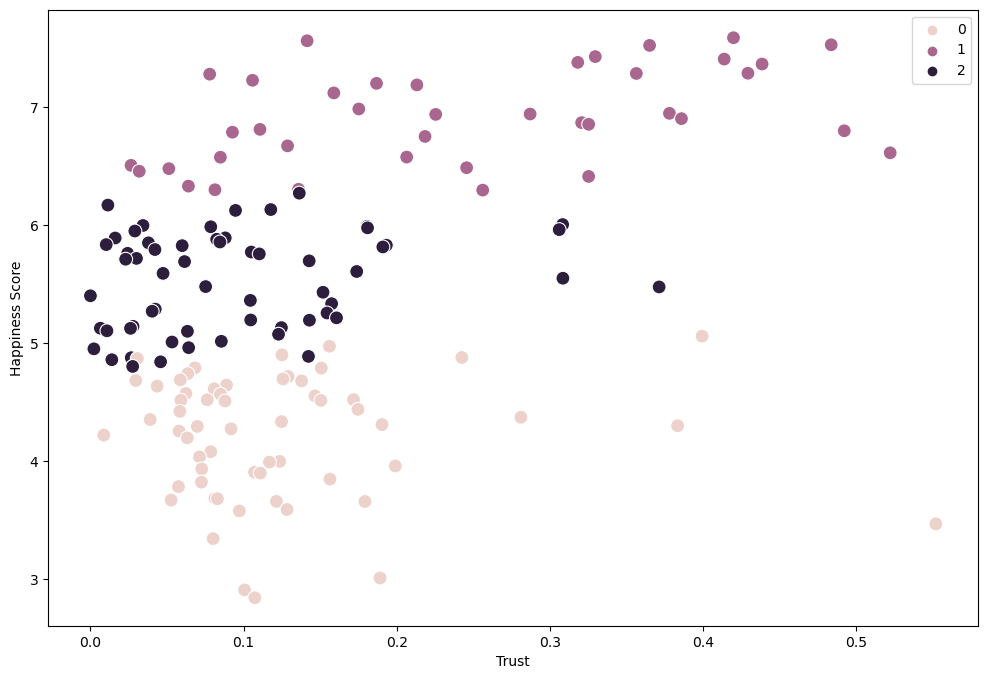

In [24]:
# Plot the clusters for the "Happiness Score" and "Trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_15['Trust'], y=df_15['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Trust') 
plt.ylabel('Happiness Score') 
plt.show()

I compared one of the higher scoring factors of Economy to a lower scoring factor of Trust. In the Economy chart you can see that the points are grouped closer together and have a clear upwards trend. This shows a stronger relationship to Happiness Score than Trust where the points are kind of all over the place. This makes sense against the scores because the higher the score of the factor the higher the overall happiness score and vice versa. 

In [25]:
df_15.loc[df_15['clusters'] == 2, 'cluster'] = 'dark purple'
df_15.loc[df_15['clusters'] == 1, 'cluster'] = 'purple'
df_15.loc[df_15['clusters'] == 0, 'cluster'] = 'pink'

In [26]:
df_15.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'Economy':['mean', 'median'], 
                         'Family':['mean', 'median'],
                          'Health':['mean', 'median'],
                          'Freedom':['mean', 'median'],
                          'Trust':['mean', 'median'],
                          'Generosity':['mean', 'median']})

Happiness Score           Economy              Family           \
                       mean  median      mean    median      mean   median   
cluster                                                                      
dark purple        5.514417  5.5685  0.952821  0.966425  1.049711  1.05605   
pink               4.213407  4.3070  0.459418  0.390470  0.770359  0.78968   
purple             6.920769  6.9010  1.267045  1.302320  1.234650  1.25596   

               Health            Freedom              Trust            \
                 mean   median      mean   median      mean    median   
cluster                                                                 
dark purple  0.712197  0.72479  0.416950  0.42584  0.096695  0.080495   
pink         0.397616  0.38215  0.350457  0.36772  0.122885  0.097190   
purple       0.856150  0.88521  0.564800  0.60362  0.246378  0.225400   

            Generosity           
                  mean   median  
cluster                          
dark purple   0.199727  0.18426  
pink          0.236191  0.21222  
purple        0.296764  0.28214

With k-means clustering we are looking for possible patterns and inisghts in the data to further explore. With the above data, I can see that for each of the factors and the happiness score, the mean is highest in the purple clusters. The results of this could be used further in determining if any of the factors have more of an effect on the overall happiness score. Is an increase in one factor going to cause an increase in Happiness Score more over another facort and vice versa. 

# 05. Import and clean 2019 dataset

In [27]:
# import 2019 data
df19 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_2019.csv'), index_col = False)

In [28]:
df19.shape

(156, 10)

In [29]:
df19.head()

Unnamed: 0  Happiness Rank Country or region  Happiness Score  Economy  \
0           0               1           Finland            7.769    1.340   
1           1               2           Denmark            7.600    1.383   
2           2               3            Norway            7.554    1.488   
3           3               4           Iceland            7.494    1.380   
4           4               5       Netherlands            7.488    1.396   

   Family  Health  Freedom  Generosity  Trust  
0   1.587   0.986    0.596       0.153  0.393  
1   1.573   0.996    0.592       0.252  0.410  
2   1.582   1.028    0.603       0.271  0.341  
3   1.624   1.026    0.591       0.354  0.118  
4   1.522   0.999    0.557       0.322  0.298

In [30]:
# drop columns 'Unnamed: 0', 'Country or region', 'Happiness Rank'
df_19 = df19.drop(columns = ['Unnamed: 0', 'Country or region', 'Happiness Rank'])

In [31]:
# check output
df_19.head()

Happiness Score  Economy  Family  Health  Freedom  Generosity  Trust
0            7.769    1.340   1.587   0.986    0.596       0.153  0.393
1            7.600    1.383   1.573   0.996    0.592       0.252  0.410
2            7.554    1.488   1.582   1.028    0.603       0.271  0.341
3            7.494    1.380   1.624   1.026    0.591       0.354  0.118
4            7.488    1.396   1.522   0.999    0.557       0.322  0.298

# 06. 2019 elbow technique

In [32]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [33]:
score2 = [kmeans[i].fit(df_19).score(df_19) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score2

/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/andrea/an

[-245.5869934102564,
 -90.96037391184757,
 -55.32469112343368,
 -40.34316841885276,
 -29.874455852139036,
 -26.217914863896887,
 -24.30918347855053,
 -22.55594829100983,
 -20.967625780353533]

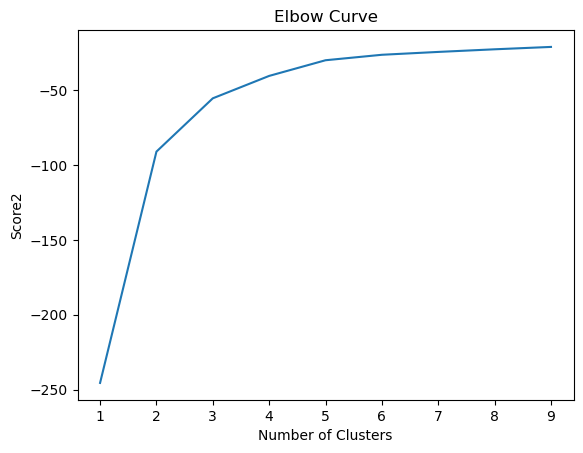

In [34]:
pl.plot(num_cl,score2)
pl.xlabel('Number of Clusters')
pl.ylabel('Score2')
pl.title('Elbow Curve')
pl.show()

Per the elbow curve the optimal count for clusters is 3. It can be seen in the chart that there is line that steeply goes up from 1 to 3, but then the curve straightens out.

# 07. 2019 k-means clustering

In [35]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [36]:
# Fit the k-means object to the data.

kmeans.fit(df_19)

/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [37]:
df_19['clusters'] = kmeans.fit_predict(df_19)

/Users/andrea/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
df_19.head()

Happiness Score  Economy  Family  Health  Freedom  Generosity  Trust  \
0            7.769    1.340   1.587   0.986    0.596       0.153  0.393   
1            7.600    1.383   1.573   0.996    0.592       0.252  0.410   
2            7.554    1.488   1.582   1.028    0.603       0.271  0.341   
3            7.494    1.380   1.624   1.026    0.591       0.354  0.118   
4            7.488    1.396   1.522   0.999    0.557       0.322  0.298   

   clusters  
0         0  
1         0  
2         0  
3         0  
4         0

In [39]:
df_19['clusters'].value_counts()

2    66
1    60
0    30
Name: clusters, dtype: int64

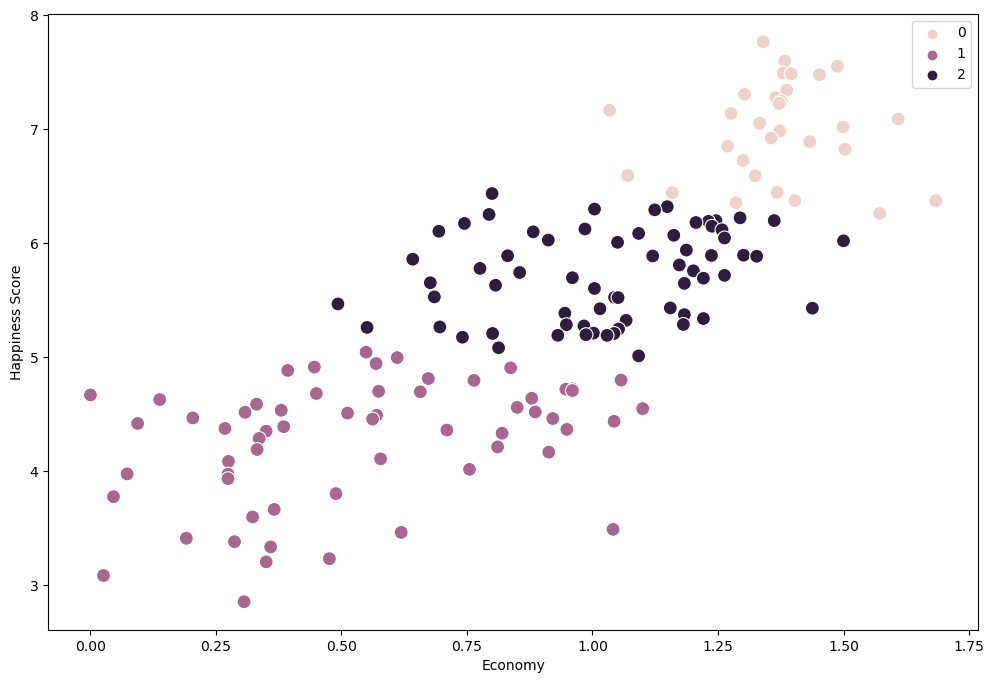

In [40]:
# Plot the clusters for the "Happiness Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_19['Economy'], y=df_19['Happiness Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

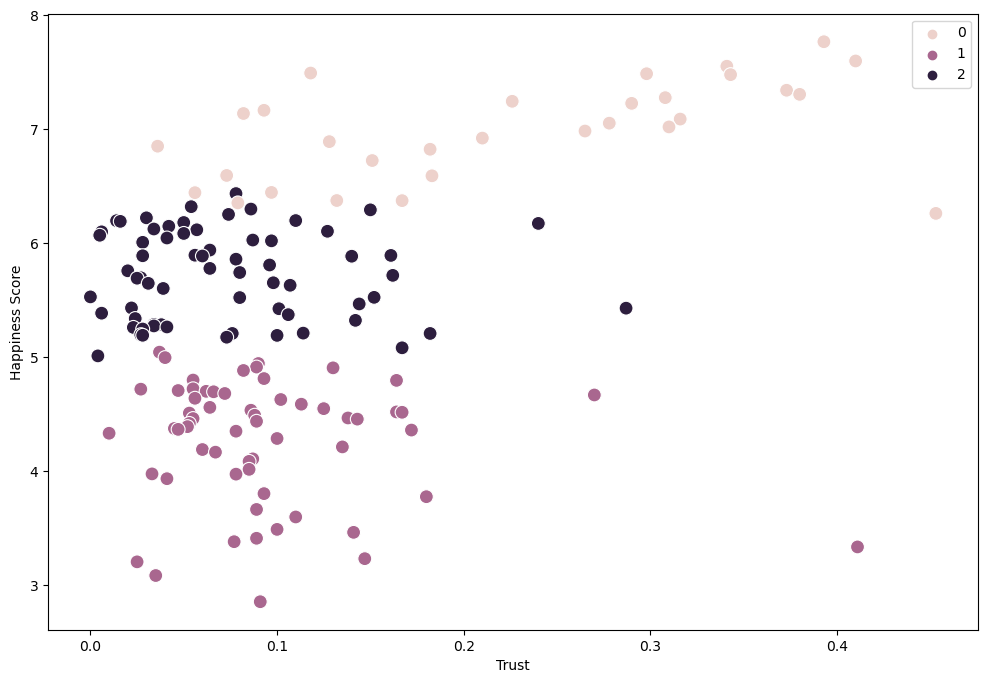

In [41]:
# Plot the clusters for the "Happiness Score" and "Trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_19['Trust'], y=df_19['Happiness Score'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Trust') 
plt.ylabel('Happiness Score') 
plt.show()

I compared one of the higher scoring factors of Economy to a lower scoring factor of Trust. In the Economy chart you can see that the points are grouped closer together and have a clear upwards trend. This shows a stronger relationship to Happiness Score than Trust where the points are kind of all over the place. This makes sense against the scores because the higher the score of the factor the higher the overall happiness score and vice versa.

In [42]:
df_19.loc[df_19['clusters'] == 2, 'cluster'] = 'dark purple'
df_19.loc[df_19['clusters'] == 1, 'cluster'] = 'purple'
df_19.loc[df_19['clusters'] == 0, 'cluster'] = 'pink'

In [43]:
df_19.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'Economy':['mean', 'median'], 
                         'Family':['mean', 'median'],
                          'Health':['mean', 'median'],
                          'Freedom':['mean', 'median'],
                          'Trust':['mean', 'median'],
                          'Generosity':['mean', 'median']})

Happiness Score           Economy            Family          \
                       mean  median      mean  median      mean  median   
cluster                                                                   
dark purple        5.719045  5.7305  1.028833  1.0470  1.334000  1.3530   
pink               6.996767  7.0375  1.369767  1.3725  1.479833  1.4855   
purple             4.269117  4.4275  0.536783  0.5005  0.935600  0.9815   

               Health           Freedom             Trust         Generosity  \
                 mean  median      mean  median      mean  median       mean   
cluster                                                                        
dark purple  0.816697  0.8215  0.404152  0.4375  0.073409  0.0585   0.157712   
pink         0.980400  0.9990  0.509800  0.5435  0.225700  0.2180   0.234667   
purple       0.497067  0.4875  0.321217  0.3450  0.093967  0.0855   0.189783   

                     
             median  
cluster              
dark purple  0.1395  
pink         0.2610  
purple       0.1870

With k-means clustering we are looking for possible patterns and inisghts in the data to further explore. With the above data, I can see that for each of the factors and the happiness score, the mean is highest in the pink clusters. This differs from the 2015 dataset where the mean is highest in the purple clusters. The results of this could be used further in determining if any of the factors have more of an effect on the overall happiness score. Is an increase in one factor going to cause an increase in Happiness Score more over another factor and vice versa. Could also be used to further investigate the change that occurred between 2015 and 2019.